In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# !rm filename

In [0]:
def dataFrame(filename):
  df=pd.read_csv(filename)
  # print(df.columns)
  # print(df.head())
  return df

In [0]:
def graph(dataframe,col1,col2):
  G = nx.from_pandas_edgelist(dataframe, source=col1, target=col2, edge_attr=True)
  return G

In [0]:
def find_path(graph,origin,destiny):
  path=[origin]
  current =origin
  visited=[origin]
  found=0
  while current!=destiny:
    # print(current)
    found=0
    for loc in list(graph.neighbors(current)):
      if loc not in visited:
        found=1
        current=loc
    if found==1:
      visited.append(current)
      path.append(current)
    else:
      path.remove(current)
      current=path[-1]
  return path

In [0]:
def evaluation(graph,path,origin,destiny,attribute):
  attr=0
  for i in range(len(path)-1):
    attr+=graph[path[i]][path[i+1]][attribute]
  print(attribute,'between',origin,'and',destiny,'is:',attr)

In [0]:
def color_path(graph,path):
  for node in graph.nodes():
    c=['green' if x in path else 'red' for x in graph.nodes()]   
  return c      

In [0]:
def draw_Graph(graph,color):
  plt.figure(figsize=(12,6.5))
  nx.draw_networkx(graph,node_color=color,with_labels=True)
  plt.show()

#Cities

In [0]:
df=dataFrame("cities_in_az.csv")
df

,Origin,Destiny,Hours
0,Alat,Baku,1.08
1,Baku,Alat,1.13
2,Alat,Shirvan,0.83
3,Shirvan,Alat,0.80
4,Imishli,Shirvan,1.42
5,Shirvan,Imishli,1.38
6,Shamakhi,Imishli,1.83
7,Imishli,Shamakhi,1.87
8,Shamakhi,Baku,1.67
9,Baku,Shamakhi,1.77


In [0]:
G=graph(df,'Origin','Destiny')

In [0]:
"""
def attribute_for_nodes(G, attribute, default_value):
# Create an attribute for every node in G and set it with default value;
# If called again, reset all nodes’ attribute to default value 
  for g in G.nodes.keys():
    G.nodes[g][attribute] = default_value

for i in range(len(df.index)):
  G[df.Origin[i]][df.Destiny[i]]['hours']=df.Hours[i]
"""  

In [0]:
"""
nid1='Baku'
nid2='Alat'
G.nodes()
G[nid1]
G.nodes.data()
G.nodes[nid1]
G.edges(data=True)
list(G.neighbors('Baku'))
G.edges.data()
G.get_edge_data(nid1,nid2)
G[nid1][nid2]['Hours']
"""

In [0]:
nid1='Baku'
nid2='Kurdamir'
path=find_path(G,nid1,nid2)
evaluation(G,path,nid1,nid2,'Hours')
path

Hours between Baku and Kurdamir is: 4.16


['Baku', 'Shamakhi', 'Goychay', 'Kurdamir']

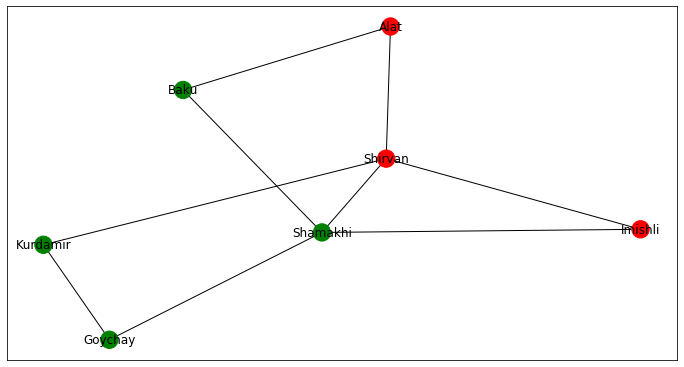

In [0]:
color=color_path(G,path)
draw_Graph(G,color)

#Airports

In [0]:
dF=dataFrame("airports.csv")
dF


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2008,1,18,5,1206.0,1200,1713.0,1705,172.0,LAX,HOU,1390
49996,2008,1,18,5,807.0,810,1306.0,1315,170.0,LAX,HOU,1390
49997,2008,1,18,5,1834.0,1815,1933.0,1920,45.0,LAX,LAS,236
49998,2008,1,18,5,725.0,725,821.0,825,42.0,LAX,LAS,236


In [0]:
g=graph(dF,'Origin','Dest')

In [0]:
"""
Graph.nodes()
Graph.edges
Graph['IAD']['TPA']['Year']
list(Graph.neighbors('IAD'))
"""

In [0]:
nid1='IAD'
nid2='SNA'
p=find_path(g,nid1,nid2)
evaluation(g,p,nid1,nid2,'Distance')
evaluation(g,p,nid1,nid2,'AirTime')
p

Distance between IAD and SNA is: 14542
AirTime between IAD and SNA is: 2038.0


['IAD',
 'MDW',
 'TUS',
 'ABQ',
 'HOU',
 'HRL',
 'AUS',
 'ELP',
 'DAL',
 'BHM',
 'BWI',
 'FLL',
 'BNA',
 'DTW',
 'STL',
 'TUL',
 'PHX',
 'TPA',
 'DEN',
 'AMA',
 'LAS',
 'SNA']

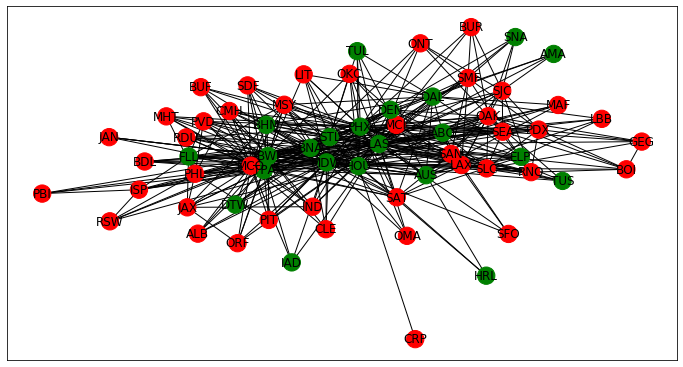

In [0]:
c=color_path(g,p)
draw_Graph(g,c)